In [158]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
import xlsxwriter
import os
import fnmatch
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [159]:
txt = []
for root, dirs, files in os.walk('./Tweets'):
    for _file in files:
        if fnmatch.fnmatch(_file,'*.xlsx'):
            txt.append(_file.split('.')[0])
txt

['AAL',
 'ADP',
 'CERN',
 'CSCO',
 'EA',
 'EBAY',
 'EXPE',
 'FISV',
 'TXN',
 'WDC',
 'TMUS']

Train - Test split: only use Compound_multiplied_scaled as x

In [160]:
x = np.array(all_data[['Compound_multiplied_scaled']]) #
y = np.array(all_data['Buy/Sell'])

# from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [161]:
def func(cvs, scores, x_train, x_test, y_train, y_test):
    # KNN - K-Nearest-Neighbors
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(x_train, y_train) 
    neigh_cv = cross_val_score(neigh, x_train, y_train, cv=5) 

    # Logistic Regression
    logreg = LogisticRegression(random_state=42)
    logreg.fit(x_train, y_train)
    logreg_cv = cross_val_score(logreg, x_train, y_train, cv=5)

    # Support Vector Machines (SVM) with linear kernel
    svm_linear = SVC( kernel = 'linear')
    svm_linear.fit(x_train, y_train)
    svm_linear_cv = cross_val_score(svm_linear, x_train, y_train, cv=5)

    # Decision Trees
    # from sklearn import tree
    dtc = tree.DecisionTreeClassifier(random_state=42)
    dtc.fit(x_train, y_train) 
    dtc_cv = cross_val_score(dtc, x_train, y_train, cv=5) 

    # Random Forest
    forest_reg = RandomForestClassifier(random_state=42)
    forest_reg.fit(x_train, y_train)
    forest_reg_cv = cross_val_score(forest_reg, x_train, y_train, cv=5) 

    cv_mean={'KNN':neigh_cv.mean(), 'LogReg':logreg_cv.mean(), 
          'SVM linear':svm_linear_cv.mean(), 
          'Decision Tree':dtc_cv.mean(), 'Random Forest':forest_reg_cv.mean()}
    
    score = {'KNN':neigh.score(x_test, y_test), 'LogReg':logreg.score( x_test, y_test), 
          'SVM linear':svm_linear.score(x_test, y_test), 
          'Decision Tree':dtc.score(x_test, y_test), 'Random Forest':forest_reg.score(x_test, y_test)}
    
    scores.append(score)
    cvs.append(cv_mean)
    

cvs = []
scores = []
for stock in txt:
    all_data = pd.read_csv('Clean_Data/${}_pred.csv'.format(stock))
    all_data.rename(columns={"Unnamed: 0": "datetime"},inplace=True)
    all_data['datetime']=pd.to_datetime(all_data['datetime'])
    all_data.set_index("datetime",inplace=True)
    all_data = all_data[np.isfinite(all_data['Buy/Sell'])]
    x = np.array(all_data[['Compound_multiplied_scaled']]) #
    y = np.array(all_data['Buy/Sell'])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    print(stock)
    
    func(cvs,scores, x_train, x_test, y_train, y_test)

AAL
ADP
CERN
CSCO
EA
EBAY
EXPE
FISV
TXN
WDC
TMUS


In [162]:
cv_mean = pd.DataFrame(cvs)
cv_mean.insert(0,'Stock',txt)
cv_mean

,Stock,KNN,LogReg,SVM linear,Decision Tree,Random Forest
0,AAL,0.727778,0.613889,0.613889,0.702778,0.702778
1,ADP,0.511111,0.583333,0.605556,0.630556,0.630556
2,CERN,0.544444,0.636111,0.636111,0.452778,0.452778
3,CSCO,0.575000,0.613889,0.613889,0.569444,0.569444
4,EA,0.569444,0.569444,0.569444,0.547222,0.547222
5,EBAY,0.491667,0.591667,0.591667,0.427778,0.427778
6,EXPE,0.636111,0.613889,0.613889,0.702778,0.702778
7,FISV,0.536111,0.558333,0.536111,0.538889,0.538889
8,TXN,0.461111,0.627778,0.627778,0.500000,0.500000
9,WDC,0.566667,0.569444,0.569444,0.447222,0.447222


In [163]:
model_scores = pd.DataFrame(scores)
model_scores.insert(0,'Stock',txt)
model_scores

,Stock,KNN,LogReg,SVM linear,Decision Tree,Random Forest
0,AAL,0.636364,0.636364,0.636364,0.545455,0.545455
1,ADP,0.454545,0.454545,0.454545,0.454545,0.454545
2,CERN,0.636364,0.545455,0.545455,0.545455,0.545455
3,CSCO,0.545455,0.363636,0.363636,0.636364,0.636364
4,EA,0.181818,0.181818,0.181818,0.545455,0.545455
5,EBAY,0.363636,0.363636,0.363636,0.545455,0.545455
6,EXPE,0.363636,0.636364,0.636364,0.545455,0.545455
7,FISV,0.454545,0.636364,0.636364,0.454545,0.454545
8,TXN,0.545455,0.545455,0.545455,0.363636,0.363636
9,WDC,0.272727,0.363636,0.363636,0.454545,0.454545


In [164]:
cv_mean.to_csv('cross_validation.csv',index=False)
model_scores.to_csv('model_scores.csv',index=False)


Train - Test split: reserve all data features

In [165]:
cvs = []
scores = []
for stock in txt:
    all_data = pd.read_csv('Clean_Data/${}_pred.csv'.format(stock))
    all_data.rename(columns={"Unnamed: 0": "datetime"},inplace=True)
    all_data['datetime']=pd.to_datetime(all_data['datetime'])
    all_data.set_index("datetime",inplace=True)
    all_data = all_data[np.isfinite(all_data['Buy/Sell'])]

    x_train,x_test = all_data.iloc[:44,:-1], all_data.iloc[44:,:-1]
    y_train,y_test = all_data['Buy/Sell'][:44],all_data['Buy/Sell'][44:]

    x_train['log_ret'] = np.log(x_train['Adj Close']) - np.log(x_train['Adj Close'].shift(1))
    x_train.drop('Adj Close',axis=1,inplace=True)
    x_train = x_train[np.isfinite(x_train['log_ret'])]
    y_train=y_train[1:]

    x_test['log_ret'] = np.log(x_test['Adj Close']) - np.log(x_test['Adj Close'].shift(1))
    x_test.drop('Adj Close',axis=1,inplace=True)
    x_test = x_test[np.isfinite(x_test['log_ret'])]
    y_test=y_test[1:]

    imputer = SimpleImputer(strategy='mean').fit(x_train)
    scaler = StandardScaler().fit(x_train)

    x_train = imputer.transform(x_train)
    x_test = imputer.transform(x_test)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    print(stock)
    func(cvs,scores,x_train, x_test, y_train, y_test)
    


AAL
ADP
CERN
CSCO
EA
EBAY
EXPE
FISV
TXN
WDC
TMUS


In [166]:
cv_mean2 = pd.DataFrame(cvs)
cv_mean2.insert(0,'Stock',txt)
cv_mean2

,Stock,KNN,LogReg,SVM linear,Decision Tree,Random Forest
0,AAL,0.533333,0.586111,0.563889,0.558333,0.630556
1,ADP,0.555556,0.530556,0.580556,0.558333,0.513889
2,CERN,0.463889,0.561111,0.563889,0.425000,0.486111
3,CSCO,0.513889,0.511111,0.444444,0.375000,0.488889
4,EA,0.469444,0.488889,0.511111,0.422222,0.530556
5,EBAY,0.391667,0.397222,0.438889,0.347222,0.325000
6,EXPE,0.563889,0.513889,0.538889,0.461111,0.536111
7,FISV,0.602778,0.605556,0.561111,0.447222,0.561111
8,TXN,0.627778,0.561111,0.541667,0.647222,0.650000
9,WDC,0.425000,0.466667,0.463889,0.541667,0.466667


In [167]:
model_scores2 = pd.DataFrame(scores)
model_scores2.insert(0,'Stock',txt)
model_scores2

,Stock,KNN,LogReg,SVM linear,Decision Tree,Random Forest
0,AAL,0.500000,0.500000,0.300000,0.600000,0.400000
1,ADP,0.333333,0.555556,0.555556,0.555556,0.666667
2,CERN,0.600000,0.600000,0.600000,0.500000,0.600000
3,CSCO,0.400000,0.800000,0.900000,0.600000,0.700000
4,EA,0.400000,0.700000,0.500000,0.500000,0.600000
5,EBAY,0.400000,0.400000,0.600000,0.600000,0.500000
6,EXPE,0.600000,0.700000,0.700000,0.500000,0.700000
7,FISV,0.714286,0.571429,0.714286,0.571429,0.714286
8,TXN,0.666667,0.666667,0.444444,0.555556,0.555556
9,WDC,0.500000,0.500000,0.500000,0.600000,0.600000


In [168]:
cv_mean2.to_csv('cross_validation2.csv',index=False)
model_scores2.to_csv('model_scores2.csv',index=False)

Model Outcomes VS Market

Given the input 'Compound_multiplied_scaled', should the stock be bought or sold?

In [169]:
all_data = pd.read_csv('Clean_Data/${}_pred.csv'.format('AAL'))
all_data.rename(columns={"Unnamed: 0": "datetime"},inplace=True)
all_data['datetime']=pd.to_datetime(all_data['datetime'])
all_data.set_index("datetime",inplace=True)
all_data = all_data[np.isfinite(all_data['Buy/Sell'])]
x_train = np.array(all_data[['Compound_multiplied_scaled']]) #
y_train = np.array(all_data['Buy/Sell'])

fall2020 = pd.read_csv('$AAL_backtest.csv')
fall2020.rename(columns={"Unnamed: 0": "datetime"},inplace=True)
fall2020['datetime']=pd.to_datetime(fall2020['datetime'])
fall2020.set_index("datetime",inplace=True)
fall2020 = fall2020[np.isfinite(fall2020['Buy/Sell'])]
x_test = np.array(fall2020[['Compound_multiplied_scaled']])
y_test = np.array(fall2020[['Buy/Sell']])

In [170]:
cvs = []
scores = []
func(cvs,scores,x_train, x_test, y_train, y_test)

In [171]:
pd.DataFrame(cvs)

,KNN,LogReg,SVM linear,Decision Tree,Random Forest
0,0.690909,0.618182,0.618182,0.618182,0.618182


In [172]:
pd.DataFrame(scores)

,KNN,LogReg,SVM linear,Decision Tree,Random Forest
0,0.571429,0.5,0.5,0.642857,0.642857


In [173]:
# KNN - K-Nearest-Neighbors
neigh = KNeighborsClassifier(n_neighbors=5)
    
# Logistic Regression
logreg = LogisticRegression(random_state=42)

# Support Vector Machines (SVM) with linear kernel
svm_linear = SVC( kernel = 'linear')

# Decision Trees
dtc = tree.DecisionTreeClassifier(random_state=42)

# Random Forest
forest_reg = RandomForestClassifier(random_state=42)
   
Buy_or_Sell_KNN = []
Buy_or_Sell = neigh.fit(x_train, y_train) 
outcome_KNN = (Buy_or_Sell.predict(fall2020[['Compound_multiplied_scaled']]))
fall2020['KNN_prediction'] = outcome_KNN

Buy_or_Sell_LogReg = []
Buy_or_Sell = logreg.fit(x_train, y_train) 
outcome_logreg = (Buy_or_Sell.predict(fall2020[['Compound_multiplied_scaled']]))
fall2020['LogReg_prediction'] = outcome_logreg

Buy_or_Sell_SVM = []
Buy_or_Sell = neigh.fit(x_train, y_train) 
outcome_svm = (Buy_or_Sell.predict(fall2020[['Compound_multiplied_scaled']]))
fall2020['SVM_prediction'] = outcome_svm

Buy_or_Sell_DecTree = []
Buy_or_Sell = dtc.fit(x_train, y_train) 
outcome_DT = (Buy_or_Sell.predict(fall2020[['Compound_multiplied_scaled']]))
fall2020['Decision_Tree_prediction'] = outcome_DT

Buy_or_Sell_Forest = []
Buy_or_Sell = forest_reg.fit(x_train, y_train) 
outcome_RF = (Buy_or_Sell.predict(fall2020[['Compound_multiplied_scaled']]))
fall2020['Random_Forest_prediction'] = outcome_RF

Daily prediction from each model in one dataframe; fall2020

In [174]:
fall2020

,Volume,Open,Adj Close,HiLo_vola_stock,Favs,RTs,Followers,Following,Is a RT,neg,neu,pos,Compound_multiplied_scaled,Buy/Sell,KNN_prediction,LogReg_prediction,SVM_prediction,Decision_Tree_prediction,Random_Forest_prediction
datetime,,,,,,,,,,,,,,,,,,,
2020-09-28,63558200,12.74,12.76,5.172413,8098.812165,2.391771,3600.379249,594.828265,False,0.016268,0.833385,0.150358,0.072183,-1.0,1.0,-1.0,1.0,1.0,1.0
2020-09-29,46994300,12.59,12.25,4.489797,4860.850069,6.232462,3567.019257,902.360385,False,0.016469,0.835026,0.148502,-0.031739,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-09-30,65055100,12.32,12.29,5.695686,6960.192593,3.540741,9237.896296,799.216049,False,0.018785,0.846684,0.134510,0.082858,1.0,1.0,-1.0,1.0,1.0,1.0
2020-10-01,48842000,12.45,12.58,3.338633,4473.891892,1.423898,4234.291607,1334.857752,False,0.022326,0.855706,0.121979,0.056719,1.0,1.0,-1.0,1.0,-1.0,-1.0
2020-10-02,111883300,12.05,13.00,10.384618,11086.692819,8.852394,3981.421543,835.114362,False,0.019262,0.841932,0.138812,0.019837,1.0,-1.0,-1.0,-1.0,1.0,1.0
2020-10-05,53465500,13.09,13.12,3.429877,3344.714729,0.367442,2117.675969,658.368992,False,0.014400,0.859546,0.126068,0.008282,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-10-06,85252400,13.28,12.53,7.821226,38793.074210,536.369581,3022.882439,1787.093314,False,0.099727,0.842143,0.058134,-0.100298,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-10-07,61274200,12.98,13.07,2.830910,13515.674970,157.256228,3212.824437,1039.532622,False,0.037463,0.836808,0.125727,0.061235,-1.0,1.0,-1.0,1.0,-1.0,-1.0
2020-10-08,88851700,13.33,13.16,7.218851,4535.857788,1.898420,4103.321670,494.380361,False,0.026217,0.840173,0.133600,-0.072501,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


## Comparisons: Buy-and-hold vs. six alternative strategies based on the binary classifier algorithms¶

In [175]:
fall2020["Gain_or_Loss_KNN"] = (fall2020['Adj Close'] - fall2020['Adj Close'].shift(1))*fall2020['KNN_prediction']
fall2020["Gain_or_Loss_KNN"][0] = 0
fall2020["Gain_or_Loss_LogReg"] = (fall2020['Adj Close'] - fall2020['Adj Close'].shift(1))*fall2020['LogReg_prediction']
fall2020["Gain_or_Loss_LogReg"][0] = 0
fall2020["Gain_or_Loss_SVM"] = (fall2020['Adj Close'] - fall2020['Adj Close'].shift(1))*fall2020['SVM_prediction']
fall2020["Gain_or_Loss_SVM"][0] = 0
fall2020["Gain_or_Loss_DecisionTree"] = (fall2020['Adj Close'] - fall2020['Adj Close'].shift(1))*fall2020['Decision_Tree_prediction']
fall2020["Gain_or_Loss_DecisionTree"][0] = 0
fall2020["Gain_or_Loss_RandomForest"] = (fall2020['Adj Close'] - fall2020['Adj Close'].shift(1))*fall2020['Random_Forest_prediction']
fall2020["Gain_or_Loss_RandomForest"][0] = 0
fall2020

C:\Users\abc33\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\abc33\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\abc33\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\abc33\anaconda3\lib\site-packages\ipykernel_laun

,Volume,Open,Adj Close,HiLo_vola_stock,Favs,RTs,Followers,Following,Is a RT,neg,...,KNN_prediction,LogReg_prediction,SVM_prediction,Decision_Tree_prediction,Random_Forest_prediction,Gain_or_Loss_KNN,Gain_or_Loss_LogReg,Gain_or_Loss_SVM,Gain_or_Loss_DecisionTree,Gain_or_Loss_RandomForest
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-28,63558200,12.74,12.76,5.172413,8098.812165,2.391771,3600.379249,594.828265,False,0.016268,...,1.0,-1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2020-09-29,46994300,12.59,12.25,4.489797,4860.850069,6.232462,3567.019257,902.360385,False,0.016469,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.510000,0.510000,0.510000,0.510000,0.510000
2020-09-30,65055100,12.32,12.29,5.695686,6960.192593,3.540741,9237.896296,799.216049,False,0.018785,...,1.0,-1.0,1.0,1.0,1.0,0.040000,-0.040000,0.040000,0.040000,0.040000
2020-10-01,48842000,12.45,12.58,3.338633,4473.891892,1.423898,4234.291607,1334.857752,False,0.022326,...,1.0,-1.0,1.0,-1.0,-1.0,0.290000,-0.290000,0.290000,-0.290000,-0.290000
2020-10-02,111883300,12.05,13.00,10.384618,11086.692819,8.852394,3981.421543,835.114362,False,0.019262,...,-1.0,-1.0,-1.0,1.0,1.0,-0.420000,-0.420000,-0.420000,0.420000,0.420000
2020-10-05,53465500,13.09,13.12,3.429877,3344.714729,0.367442,2117.675969,658.368992,False,0.014400,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.120000,-0.120000,-0.120000,-0.120000,-0.120000
2020-10-06,85252400,13.28,12.53,7.821226,38793.074210,536.369581,3022.882439,1787.093314,False,0.099727,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.590000,0.590000,0.590000,0.590000,0.590000
2020-10-07,61274200,12.98,13.07,2.830910,13515.674970,157.256228,3212.824437,1039.532622,False,0.037463,...,1.0,-1.0,1.0,-1.0,-1.0,0.540000,-0.540000,0.540000,-0.540000,-0.540000
2020-10-08,88851700,13.33,13.16,7.218851,4535.857788,1.898420,4103.321670,494.380361,False,0.026217,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.090000,-0.090000,-0.090000,-0.090000,-0.090000


### Resetting index to replace datetime; needed to make comparison between Buy-and-hold and Algorithm-based below

In [176]:
fall2020 = fall2020.reset_index()
fall2020

,datetime,Volume,Open,Adj Close,HiLo_vola_stock,Favs,RTs,Followers,Following,Is a RT,...,KNN_prediction,LogReg_prediction,SVM_prediction,Decision_Tree_prediction,Random_Forest_prediction,Gain_or_Loss_KNN,Gain_or_Loss_LogReg,Gain_or_Loss_SVM,Gain_or_Loss_DecisionTree,Gain_or_Loss_RandomForest
0,2020-09-28,63558200,12.74,12.76,5.172413,8098.812165,2.391771,3600.379249,594.828265,False,...,1.0,-1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-09-29,46994300,12.59,12.25,4.489797,4860.850069,6.232462,3567.019257,902.360385,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.510000,0.510000,0.510000,0.510000,0.510000
2,2020-09-30,65055100,12.32,12.29,5.695686,6960.192593,3.540741,9237.896296,799.216049,False,...,1.0,-1.0,1.0,1.0,1.0,0.040000,-0.040000,0.040000,0.040000,0.040000
3,2020-10-01,48842000,12.45,12.58,3.338633,4473.891892,1.423898,4234.291607,1334.857752,False,...,1.0,-1.0,1.0,-1.0,-1.0,0.290000,-0.290000,0.290000,-0.290000,-0.290000
4,2020-10-02,111883300,12.05,13.00,10.384618,11086.692819,8.852394,3981.421543,835.114362,False,...,-1.0,-1.0,-1.0,1.0,1.0,-0.420000,-0.420000,-0.420000,0.420000,0.420000
5,2020-10-05,53465500,13.09,13.12,3.429877,3344.714729,0.367442,2117.675969,658.368992,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.120000,-0.120000,-0.120000,-0.120000,-0.120000
6,2020-10-06,85252400,13.28,12.53,7.821226,38793.074210,536.369581,3022.882439,1787.093314,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.590000,0.590000,0.590000,0.590000,0.590000
7,2020-10-07,61274200,12.98,13.07,2.830910,13515.674970,157.256228,3212.824437,1039.532622,False,...,1.0,-1.0,1.0,-1.0,-1.0,0.540000,-0.540000,0.540000,-0.540000,-0.540000
8,2020-10-08,88851700,13.33,13.16,7.218851,4535.857788,1.898420,4103.321670,494.380361,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.090000,-0.090000,-0.090000,-0.090000,-0.090000
9,2020-10-09,65281000,13.25,13.20,4.090909,3013.325909,0.840563,1102.879250,470.893318,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000


Add a column where the daily result is added to last day's cumulative result. But first, take the 'Close' of the first day and set it as result for the first day = starting point on the first row

In [177]:
#Takes the 'Adj Close' of the first day and sets it as result for the first day=starting point
# first_day_result = fall2020.iloc[0]['Adj Close']
fall2020.at[0, 'KNN_Result'] = 0
fall2020.at[0, 'LogReg_Result'] = 0
fall2020.at[0, 'SVM_Result'] = 0
fall2020.at[0, 'Decision_Tree_Result'] = 0
fall2020.at[0, 'Random_Forest_Result'] = 0

In [178]:
fall2020

,datetime,Volume,Open,Adj Close,HiLo_vola_stock,Favs,RTs,Followers,Following,Is a RT,...,Gain_or_Loss_KNN,Gain_or_Loss_LogReg,Gain_or_Loss_SVM,Gain_or_Loss_DecisionTree,Gain_or_Loss_RandomForest,KNN_Result,LogReg_Result,SVM_Result,Decision_Tree_Result,Random_Forest_Result
0,2020-09-28,63558200,12.74,12.76,5.172413,8098.812165,2.391771,3600.379249,594.828265,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,2020-09-29,46994300,12.59,12.25,4.489797,4860.850069,6.232462,3567.019257,902.360385,False,...,0.510000,0.510000,0.510000,0.510000,0.510000,NaN,NaN,NaN,NaN,NaN
2,2020-09-30,65055100,12.32,12.29,5.695686,6960.192593,3.540741,9237.896296,799.216049,False,...,0.040000,-0.040000,0.040000,0.040000,0.040000,NaN,NaN,NaN,NaN,NaN
3,2020-10-01,48842000,12.45,12.58,3.338633,4473.891892,1.423898,4234.291607,1334.857752,False,...,0.290000,-0.290000,0.290000,-0.290000,-0.290000,NaN,NaN,NaN,NaN,NaN
4,2020-10-02,111883300,12.05,13.00,10.384618,11086.692819,8.852394,3981.421543,835.114362,False,...,-0.420000,-0.420000,-0.420000,0.420000,0.420000,NaN,NaN,NaN,NaN,NaN
5,2020-10-05,53465500,13.09,13.12,3.429877,3344.714729,0.367442,2117.675969,658.368992,False,...,-0.120000,-0.120000,-0.120000,-0.120000,-0.120000,NaN,NaN,NaN,NaN,NaN
6,2020-10-06,85252400,13.28,12.53,7.821226,38793.074210,536.369581,3022.882439,1787.093314,False,...,0.590000,0.590000,0.590000,0.590000,0.590000,NaN,NaN,NaN,NaN,NaN
7,2020-10-07,61274200,12.98,13.07,2.830910,13515.674970,157.256228,3212.824437,1039.532622,False,...,0.540000,-0.540000,0.540000,-0.540000,-0.540000,NaN,NaN,NaN,NaN,NaN
8,2020-10-08,88851700,13.33,13.16,7.218851,4535.857788,1.898420,4103.321670,494.380361,False,...,-0.090000,-0.090000,-0.090000,-0.090000,-0.090000,NaN,NaN,NaN,NaN,NaN
9,2020-10-09,65281000,13.25,13.20,4.090909,3013.325909,0.840563,1102.879250,470.893318,False,...,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,NaN,NaN,NaN,NaN,NaN


In [179]:
#The cumulative daily result of trading according to the model; B/S or S/B at Open and Close. 

for i in range(1, len(fall2020)):
    fall2020.loc[i, 'KNN_Result'] = fall2020.loc[i-1, 'KNN_Result'] + fall2020.loc[i, 'Gain_or_Loss_KNN']
    fall2020.loc[i, 'LogReg_Result'] = fall2020.loc[i-1, 'LogReg_Result'] + fall2020.loc[i, 'Gain_or_Loss_LogReg']
    fall2020.loc[i, 'SVM_Result'] = fall2020.loc[i-1, 'SVM_Result'] + fall2020.loc[i, 'Gain_or_Loss_SVM']
    fall2020.loc[i, 'Decision_Tree_Result'] = fall2020.loc[i-1, 'Decision_Tree_Result'] + fall2020.loc[i, 'Gain_or_Loss_DecisionTree']
    fall2020.loc[i, 'Random_Forest_Result'] = fall2020.loc[i-1, 'Random_Forest_Result'] + fall2020.loc[i, 'Gain_or_Loss_RandomForest']
    

In [180]:
fall2020

,datetime,Volume,Open,Adj Close,HiLo_vola_stock,Favs,RTs,Followers,Following,Is a RT,...,Gain_or_Loss_KNN,Gain_or_Loss_LogReg,Gain_or_Loss_SVM,Gain_or_Loss_DecisionTree,Gain_or_Loss_RandomForest,KNN_Result,LogReg_Result,SVM_Result,Decision_Tree_Result,Random_Forest_Result
0,2020-09-28,63558200,12.74,12.76,5.172413,8098.812165,2.391771,3600.379249,594.828265,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000
1,2020-09-29,46994300,12.59,12.25,4.489797,4860.850069,6.232462,3567.019257,902.360385,False,...,0.510000,0.510000,0.510000,0.510000,0.510000,0.51,0.510000,0.51,0.510000,0.510000
2,2020-09-30,65055100,12.32,12.29,5.695686,6960.192593,3.540741,9237.896296,799.216049,False,...,0.040000,-0.040000,0.040000,0.040000,0.040000,0.55,0.470000,0.55,0.550000,0.550000
3,2020-10-01,48842000,12.45,12.58,3.338633,4473.891892,1.423898,4234.291607,1334.857752,False,...,0.290000,-0.290000,0.290000,-0.290000,-0.290000,0.84,0.180000,0.84,0.260000,0.260000
4,2020-10-02,111883300,12.05,13.00,10.384618,11086.692819,8.852394,3981.421543,835.114362,False,...,-0.420000,-0.420000,-0.420000,0.420000,0.420000,0.42,-0.240000,0.42,0.680000,0.680000
5,2020-10-05,53465500,13.09,13.12,3.429877,3344.714729,0.367442,2117.675969,658.368992,False,...,-0.120000,-0.120000,-0.120000,-0.120000,-0.120000,0.30,-0.360000,0.30,0.560000,0.560000
6,2020-10-06,85252400,13.28,12.53,7.821226,38793.074210,536.369581,3022.882439,1787.093314,False,...,0.590000,0.590000,0.590000,0.590000,0.590000,0.89,0.230000,0.89,1.150001,1.150001
7,2020-10-07,61274200,12.98,13.07,2.830910,13515.674970,157.256228,3212.824437,1039.532622,False,...,0.540000,-0.540000,0.540000,-0.540000,-0.540000,1.43,-0.309999,1.43,0.610001,0.610001
8,2020-10-08,88851700,13.33,13.16,7.218851,4535.857788,1.898420,4103.321670,494.380361,False,...,-0.090000,-0.090000,-0.090000,-0.090000,-0.090000,1.34,-0.400000,1.34,0.520000,0.520000
9,2020-10-09,65281000,13.25,13.20,4.090909,3013.325909,0.840563,1102.879250,470.893318,False,...,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,1.30,-0.440000,1.30,0.480000,0.480000


### Subplots
When attempting to use Matplotlib Style, the selected style is not rendered. ggplot and seaborn styles are working, but variations of seaborn are not. Using here fivethirtyeight instead.

C:\Users\abc33\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\abc33\anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\abc33\anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

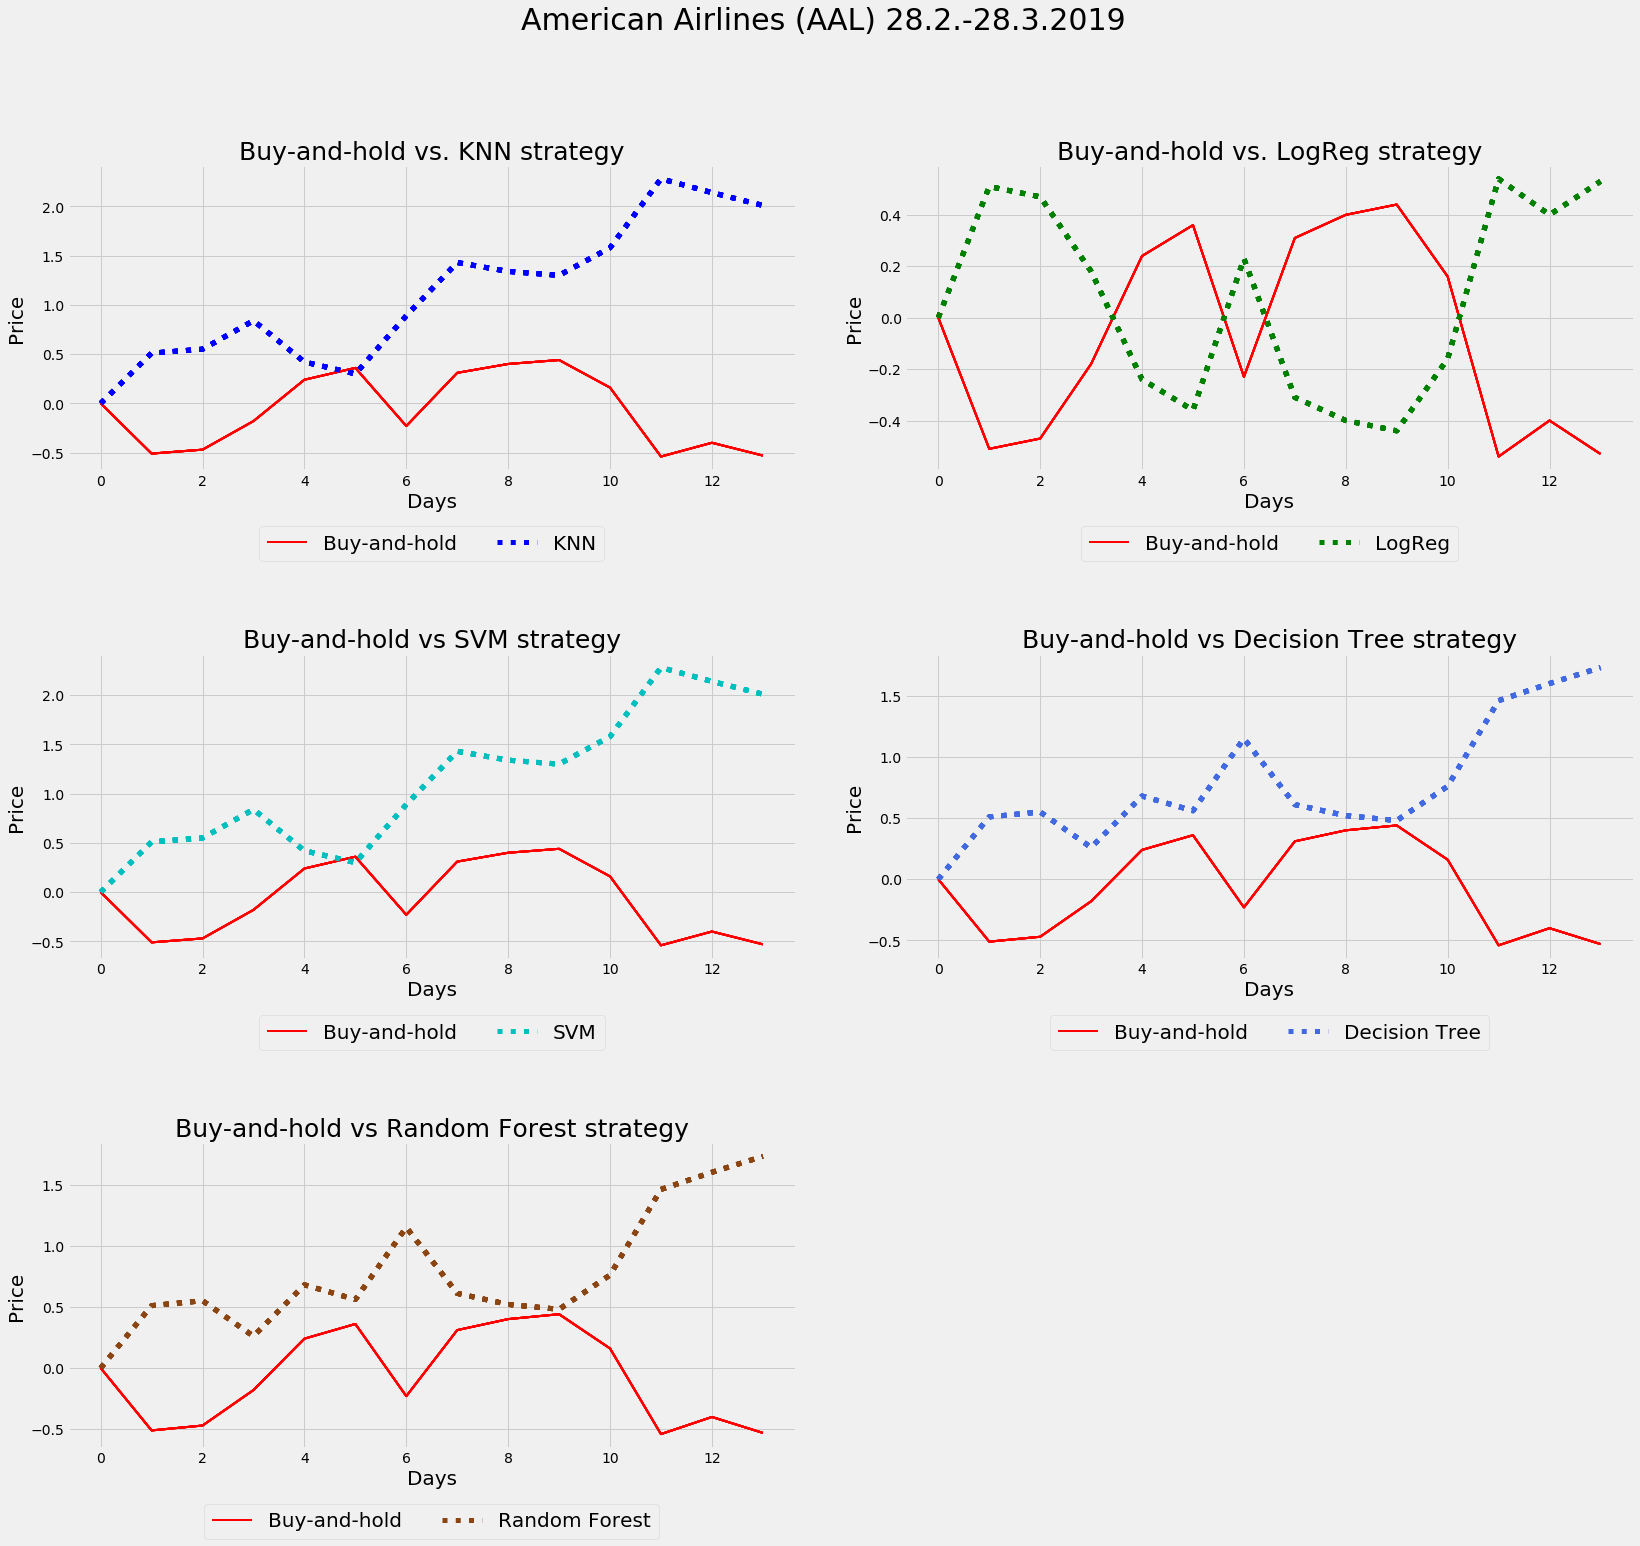

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
plt.style.use('fivethirtyeight') #ggplot or seaborn
plt.rcParams['figure.figsize'] = 25, 22 
plt.suptitle('American Airlines (AAL) 28.2.-28.3.2019', fontsize=30) #, verticalalignment='bottom'

ax1 = fall2020['Adj Close'] - fall2020['Adj Close'][0]
ax2 = fall2020['KNN_Result']
ax3 = fall2020['LogReg_Result']
ax4 = fall2020['SVM_Result']
ax5 = fall2020['Decision_Tree_Result']
ax6 = fall2020['Random_Forest_Result']

for i in range (1, 7):
    plt.subplots_adjust(hspace=0.6, wspace=0.15)
        
    plt.subplot(3,2,1)
    plt.plot(ax1, 'r',  linewidth=2)
    plt.plot(ax2,  'b',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs. KNN strategy', fontsize=25)
    a='Buy-and-hold'
    b='KNN'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,2)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax3, 'g',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs. LogReg strategy', fontsize=25)
    a='Buy-and-hold'
    b='LogReg'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,3)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax4, 'c',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs SVM strategy', fontsize=25)
    a='Buy-and-hold'
    b='SVM'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,4)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax5, 'royalblue',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs Decision Tree strategy', fontsize=25)
    a='Buy-and-hold'
    b='Decision Tree'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,5)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax6, 'saddlebrown',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs Random Forest strategy', fontsize=25)
    a='Buy-and-hold'
    b='Random Forest'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

#pylab.savefig('AAL.jpg') # Saves figure as .jpg-file
plt.show()